In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import numpy as np
import statsmodels.api as sm  # For empirical CDF
from scipy import stats

jtplot.style(theme='grade3')

plt.rcParams['figure.figsize'] = (12, 5)

In [3]:
# User-Supplied
file = '/glade/p/work/manab/ff/islandpark/output/001_001_runs_def.nc'   # Fuse output file
out = xr.open_dataset(file)
Q = out.groupby('time.year').max()
#print(out2)
#Q = out2['q_routed']
#print(Q)
Q['logQ'] = np.log10(Q['q_routed'])   #Convert discharge Q to lognormal values
#Qsort = sorted(out['logQ'])

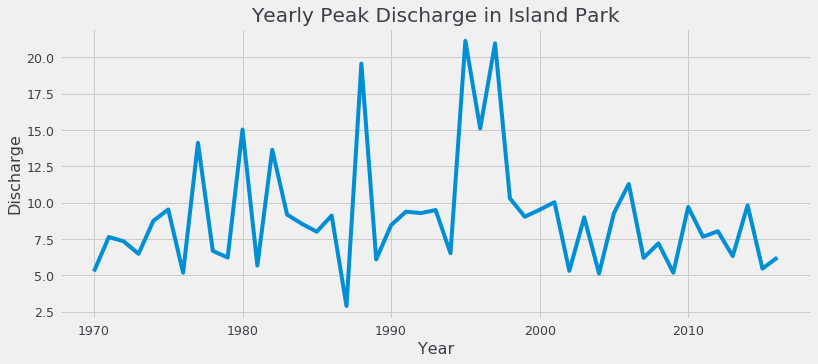

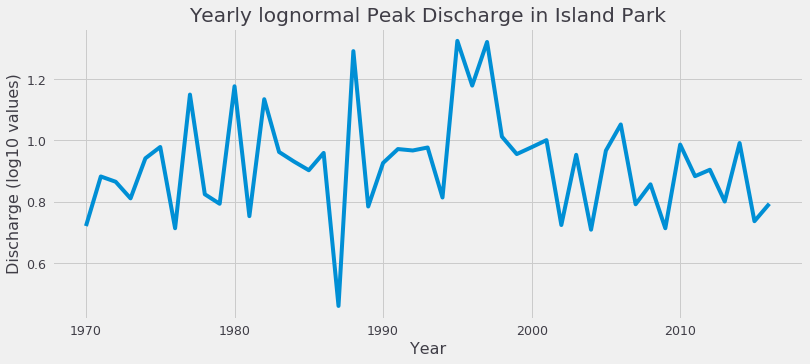

In [5]:
Q['q_routed'].plot()
plt.style.use('fivethirtyeight')
plt.ylabel('Discharge', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Yearly Peak Discharge in Island Park')
plt.show()

Q['logQ'].plot()
plt.ylabel('Discharge (log10 values)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Yearly lognormal Peak Discharge in Island Park')
plt.show()

#out'q_routed'].groupby('time.year').max().plot.hist()
#plt.show()

# Frequency and Relative Histogram

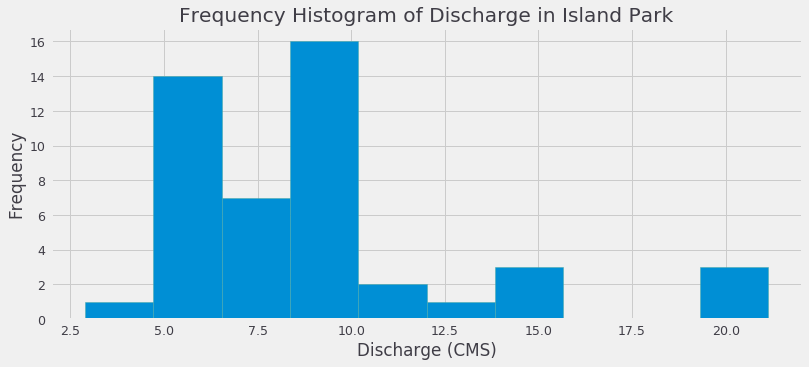

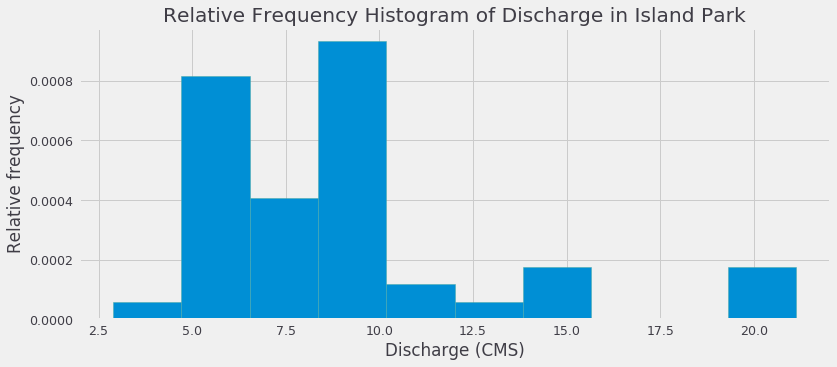

In [6]:
Q['q_routed'].plot.hist(bins=10, edgecolor='#4aaaaa')
plt.ylabel('Frequency')
plt.xlabel('Discharge (CMS)')
plt.title('Frequency Histogram of Discharge in Island Park')
plt.show()

Q['q_routed'].plot.hist(weights=np.zeros_like(Q['q_routed']) + 1. / out['q_routed'].size, edgecolor='#4aaaaa')
plt.ylabel('Relative frequency')
plt.xlabel('Discharge (CMS)')
plt.title('Relative Frequency Histogram of Discharge in Island Park')
plt.show()

# Cumulative Distribution Function (CDF)

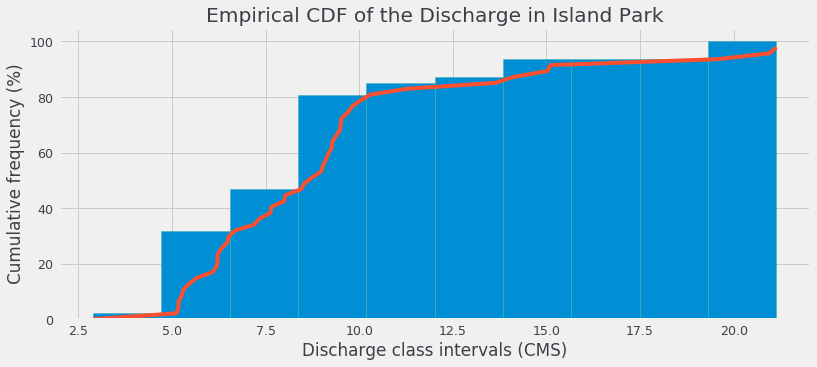

In [7]:
Q['q_routed'].plot.hist(weights=np.zeros_like(Q['q_routed']) + 100. / Q['q_routed'].size, cumulative=True,edgecolor='#4aaaaa')
plt.plot(np.sort(Q['q_routed']), np.linspace(0, 100, len(Q['q_routed']), endpoint=False))
plt.ylabel('Cumulative frequency (%)')
plt.xlabel('Discharge class intervals (CMS)')
plt.title('Empirical CDF of the Discharge in Island Park')
plt.show()

# Descriptive Statistics

In [8]:
n, min_max, mean, var, skew, kurt = stats.describe(Q['q_routed'])
median = np.median(Q['q_routed'])
std = np.sqrt(var)

print('''The Peak Annual Discharge (in CMS) statistics for the Island Park have the following characteristics:
Count: {0}
Min/Max flows: {1}
Mean: {2}
Median: {3}
Standard Deviation: {4}
Variance: {5}
Skewness: {6}
Kurtosis: {7}'''.format(n, min_max, mean, median, std, var, skew, kurt))

The Peak Annual Discharge (in CMS) statistics for the Island Park have the following characteristics:
Count: 47
Min/Max flows: (2.8861522674560547, 21.133810043334961)
Mean: 9.057171151993122
Median: 8.539213180541992
Standard Deviation: 3.9983983802342804
Variance: 15.987189607060118
Skewness: 1.5438837176075157
Kurtosis: 2.2649573826476708


# Fitting Various Distributions

In [9]:
Q['q_routed'] = Q
print(Q)
distnormal = stats.norm.pdf(Q[q_routed].values, loc = mean, scale = std) #Normal distribution
#distlognormal = stats.pearson3.pdf(Q, skew = 1, loc = mean, scale = std) #Pearson Type 3 distribution
#distweibull = stats.dweibull.pdf(Q, c = 1, loc = mean, scale = std) #Weibull distribution

ValueError: dimensions ('year',) must have the same length as the number of data dimensions, ndim=0

In [77]:
Q1.hist(edgecolor='#4aaaaa', density = True)
plt.plot(Q1, distnormal, color = 'red', label='Normal Distribution')
#plt.plot(Q, distlognormal, color = 'blue', label='Lognormal Distribution')
#plt.plot(Q, distweibull, color = 'green', label='Weibull Distribution')
plt.legend()
plt.show()

AttributeError: 'list' object has no attribute 'hist'